In [2]:

import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('perfumes.xlsx')
df.head()

,Year,Month of the year,Transaction ID,Product,Product Category (Enhanced Ecommerce),Product Brand,Product Revenue,Quantity
0,2022,1,466349,Benamôr - Benamôr - Creme de Rosto 50ml,Hidratantes,Benamôr,11.93,1
1,2022,1,466349,Lancôme - La Vie Est Belle - Eau de Parfum 1.2...,Amostras,Lancôme,0.00,1
2,2022,1,466349,Lancôme - La Vie Est Belle - Eau de Parfum 30ml,Perfumes,Lancôme,48.11,1
3,2022,1,466351,Benamôr - Benamôr - Creme Chantilly Hidratante...,Hidratantes,Benamôr,19.50,1
4,2022,1,466351,Benamôr - Benamôr - Sabonete original 100g,Banho,Benamôr,4.43,1


In [4]:
df.tail()

,Year,Month of the year,Transaction ID,Product,Product Category (Enhanced Ecommerce),Product Brand,Product Revenue,Quantity
72909,2022,10,531748,Dior - Miss Dior Blooming B - Eau de Toilette ...,Perfumes,Dior,96.75,1
72910,2022,10,531749,Anny - Anny - 168.50 - BIKINI BASH 15ml,Vernizes,Anny,7.92,1
72911,2022,10,531749,Anny - Anny - 305 - COOL ATTITUDE 15ml,Vernizes,Anny,7.92,1
72912,2022,10,531749,Anny - Anny - 314.30 - HOT CHOCOLATE WEATHER 15ml,Vernizes,Anny,7.92,1
72913,2022,10,531749,Anny - Hiking In La - 371.40 - SAVE THE GREEN ...,Vernizes,Anny,7.92,1


In [5]:
#counting unique values in dataframe
count = df.nunique()
count

Year                                         1
Month of the year                           10
Transaction ID                           46875
Product                                  11360
Product Category (Enhanced Ecommerce)       88
Product Brand                              178
Product Revenue                           6493
Quantity                                     9
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72914 entries, 0 to 72913
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   72914 non-null  int64  
 1   Month of the year                      72914 non-null  int64  
 2   Transaction ID                         72914 non-null  int64  
 3   Product                                72914 non-null  object 
 4   Product Category (Enhanced Ecommerce)  72914 non-null  object 
 5   Product Brand                          72914 non-null  object 
 6   Product Revenue                        72914 non-null  float64
 7   Quantity                               72914 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.5+ MB


In [7]:
df['Transaction ID'] = df['Transaction ID'].astype('str')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72914 entries, 0 to 72913
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   72914 non-null  int64  
 1   Month of the year                      72914 non-null  int64  
 2   Transaction ID                         72914 non-null  object 
 3   Product                                72914 non-null  object 
 4   Product Category (Enhanced Ecommerce)  72914 non-null  object 
 5   Product Brand                          72914 non-null  object 
 6   Product Revenue                        72914 non-null  float64
 7   Quantity                               72914 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.5+ MB


In [9]:
Basket = df.groupby(['Transaction ID', 'Product Category (Enhanced Ecommerce)'])['Quantity'].sum().reset_index().fillna(0).set_index('Transaction ID')
Basket

,Product Category (Enhanced Ecommerce),Quantity
Transaction ID,,
466349,Amostras,1
466349,Hidratantes,1
466349,Perfumes,1
466351,Banho,1
466351,Hidratantes,1
...,...,...
531743,Perfumes,1
531745,Perfumes,1
531747,Perfumes,1


In [10]:
#number of rows decrease as unstack changed the shape of datafram
#zero indicates that no product was bought by this transaction id

Basket = df.groupby(['Transaction ID', 'Product Category (Enhanced Ecommerce)'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction ID')
Basket


Product Category (Enhanced Ecommerce),Acessórios de Moda,Acessórios manicure,After Sun Corpo,After Sun Rosto,Aftershave,Amostras,Anti-idade,Auto-bronzeadores Corpo,Auto-bronzeadores Rosto,Avolumadores,...,Soluções específicas,Sombras,Styling,Suplementos Cabelo & Unhas,Suplementos Pele,Séruns,Tez,Tratamentos,Tónicos,Vernizes
Transaction ID,,,,,,,,,,,,,,,,,,,,,
466349,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#converting to 1 and 0 as it is required by our algorithm
#0 will mean present in transaction
#1 will mean item was not bought
def convert(x):
  if x<= 0:
    return False
  if x>= 1:
    return True
basket = Basket.applymap(convert)


**Metrics of Association Analysis**

**Support**--> if we have item A in 10 transactions out of 100 support is 10/100

**Confidence**--> We consider two items .If item B come in 5 transactions out of 10 transactions in which Item A was present the confidence will be  5/10

**Lift** --> Confidence of A and B divided by Support of B

In [46]:
#applying apriori algorithm
#By default, apriori returns the column indices of the items, which may be useful in downstream operations 
#such as association rule mining. For better readability, we can set use_colnames=True to convert these integer values into the respective item names:
#Lift basically tells us the likelihood of buying a the two items together 
#min_support  parameter is used to select the items with support values greater than the value specified by the parameter. 
#min_length parameter specifies the minimum number of items that you want in your rules.
itemset = apriori(basket, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1)
frequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(After Sun Corpo),(Protectores solares Corpo),0.003200,0.007189,0.001451,0.453333,63.056380,0.001428,1.816117
1,(Protectores solares Corpo),(After Sun Corpo),0.007189,0.003200,0.001451,0.201780,63.056380,0.001428,1.248779
2,(Séruns),(Amostras),0.035200,0.009152,0.001003,0.028485,3.112418,0.000681,1.019900
3,(Amostras),(Séruns),0.009152,0.035200,0.001003,0.109557,3.112418,0.000681,1.083506
4,(Coffrets Cosmética),(Anti-idade),0.031851,0.050347,0.001621,0.050904,1.011074,0.000018,1.000587
...,...,...,...,...,...,...,...,...,...
155,"(Séruns, Olhos & Lábios)",(Hidratantes),0.005440,0.061888,0.001408,0.258824,4.182128,0.001071,1.265707
156,"(Hidratantes, Olhos & Lábios)",(Séruns),0.005781,0.035200,0.001408,0.243542,6.918819,0.001204,1.275419
157,(Séruns),"(Hidratantes, Olhos & Lábios)",0.035200,0.005781,0.001408,0.040000,6.918819,0.001204,1.035644
158,(Hidratantes),"(Séruns, Olhos & Lábios)",0.061888,0.005440,0.001408,0.022751,4.182128,0.001071,1.017714


In [47]:
frequent.sort_values(by=['lift'],ascending = False)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(After Sun Corpo),(Protectores solares Corpo),0.003200,0.007189,0.001451,0.453333,63.056380,0.001428,1.816117
1,(Protectores solares Corpo),(After Sun Corpo),0.007189,0.003200,0.001451,0.201780,63.056380,0.001428,1.248779
62,(Champô),(Condicionador),0.019371,0.003413,0.002112,0.109031,31.942628,0.002046,1.118542
63,(Condicionador),(Champô),0.003413,0.019371,0.002112,0.618750,31.942628,0.002046,2.572143
145,(Protectores solares Rosto),(Protectores solares Corpo),0.008704,0.007189,0.001536,0.176471,24.546169,0.001473,1.205556
...,...,...,...,...,...,...,...,...,...
32,(Limpeza Desmaquilhantes),(Bases Liquidas),0.028181,0.041216,0.001344,0.047691,1.157103,0.000182,1.006799
116,(Hidratantes),(Tratamentos),0.061888,0.015765,0.001024,0.016546,1.049519,0.000048,1.000794
117,(Tratamentos),(Hidratantes),0.015765,0.061888,0.001024,0.064953,1.049519,0.000048,1.003278
4,(Coffrets Cosmética),(Anti-idade),0.031851,0.050347,0.001621,0.050904,1.011074,0.000018,1.000587


/var/folders/18/j3gjk3wn59d8pmqv5vh1f_g40000gn/T/ipykernel_6229/639449669.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(10)  # Adjust the layout for better spacing
/var/folders/18/j3gjk3wn59d8pmqv5vh1f_g40000gn/T/ipykernel_6229/639449669.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(10)  # Adjust the layout for better spacing


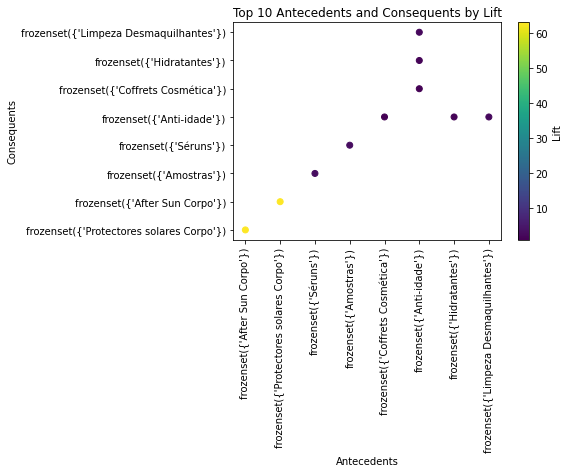

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dataset by lift in descending order
sorted_dataset = frequent.sort_values('lift', ascending=False)

# Select the top 10 antecedents, consequents, and lift values
top_10_antecedents = frequent['antecedents'].astype(str).head(10)
top_10_consequents = frequent['consequents'].astype(str).head(10)
top_10_lift = frequent['lift'].head(10)

# Create the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(top_10_antecedents, top_10_consequents, c=top_10_lift, cmap='viridis')
plt.xlabel('Antecedents')
plt.ylabel('Consequents')
plt.title('Top 10 Antecedents and Consequents by Lift')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add a colorbar-like legend
cbar = plt.colorbar(scatter)
cbar.set_label('Lift')

plt.tight_layout(10)  # Adjust the layout for better spacing
plt.show()




In [50]:
import pandas as pd

# Convert frozenset objects to strings and remove "frozenset()" notation
frequent['antecedents'] = frequent['antecedents'].astype(str).str.replace('frozenset', '')
frequent['consequents'] = frequent['consequents'].astype(str).str.replace('frozenset', '')

# Save the frequent itemsets to an Excel file
frequent.to_excel('product_categories_correlations.xlsx', index=False)



